In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

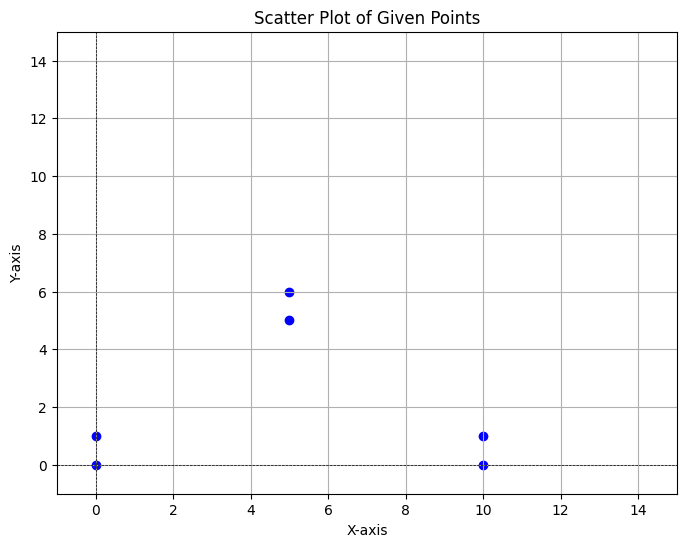

In [15]:
Y = np.array([[0,0],[0,1],[10,0],[10,1],[5,5],[5,6]])
#X = np.array([[0,9],[12,16],[12,2],[15,9]])#,[5,5],[5,6]])
x_values = Y[:, 0]  
y_values = Y[:, 1]  

plt.figure(figsize=(8, 6))  
plt.scatter(x_values, y_values, color='blue', marker='o')

plt.title('Scatter Plot of Given Points') 
plt.xlabel('X-axis')  
plt.ylabel('Y-axis')
plt.grid(True) 
plt.xlim(-1, 15)  
plt.ylim(-1, 15)   

plt.axhline(0, color='black',linewidth=0.5, ls='--') 
plt.axvline(0, color='black',linewidth=0.5, ls='--')  
plt.show()

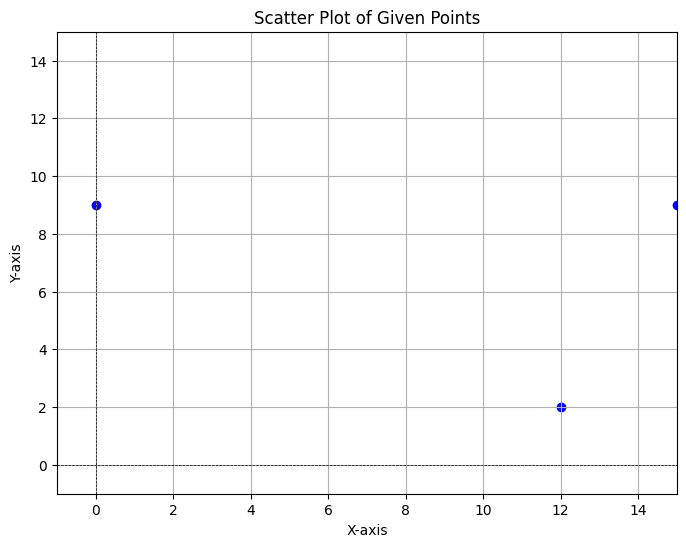

In [21]:
#X = np.array([[0,0], [1,0], [0,1], [1,1], [5,5], [6,5], [5,6], [6,6]])
#X = np.array([[0,0],[0,1],[10,0],[10,1],[5,5],[5,6]])
X = np.array([[0,9],[12,16],[12,2],[15,9]])#,[5,5],[5,6]])
x_values = X[:, 0]  
y_values = X[:, 1]  

plt.figure(figsize=(8, 6))  
plt.scatter(x_values, y_values, color='blue', marker='o')

plt.title('Scatter Plot of Given Points') 
plt.xlabel('X-axis')  
plt.ylabel('Y-axis')
plt.grid(True) 
plt.xlim(-1, 30)  
plt.ylim(-1, 30)   

plt.axhline(0, color='black',linewidth=0.5, ls='--') 
plt.axvline(0, color='black',linewidth=0.5, ls='--')  
plt.show()

In [17]:
def generate_all_subsets_numpy(n, k):
    return np.array(np.meshgrid(*[np.arange(k)] * n)).T.reshape(-1, n)

In [6]:

for k in [2,3]:
    start=time.time()
    c=0
    l=generate_all_subsets_numpy(12,k)
    for i in l:
        if len(set(i))>=k:
            c+=1
    print (c)
    end=time.time()
    print(len(l),end-start)

4094
4096 0.016583681106567383
519156
531441 1.6753623485565186


In [18]:
for k in [2,3,4,5]:
    start=time.time()
    possible_clust = generate_all_subsets_numpy(len(Y),k)
    maxss=-1
    for i in possible_clust:
        if len(set(i))<k:
            continue

        s=silhouette_score(Y, i)

        if s>maxss:
            maxss=s
            best=i
    
    end=time.time()

    print("Highest SS for ",k," clusters: ",maxss, best, end-start)

Highest SS for  2  clusters:  0.5548715178053517 [1 1 0 0 0 0] 0.05843400955200195
Highest SS for  3  clusters:  0.8585856960087929 [2 2 1 1 0 0] 0.33652520179748535
Highest SS for  4  clusters:  0.5699293789819451 [2 3 1 1 0 0] 1.182945728302002
Highest SS for  5  clusters:  0.28373414697901406 [3 4 2 1 0 0] 1.1493425369262695


In [20]:
for k in [2,3,4,5]:
    start=time.time()
    possible_clust = generate_all_subsets_numpy(len(X),k)
    maxss=-1
    for i in possible_clust:
        if len(set(i))<k:
            continue

        s=silhouette_score(X, i)

        if s>maxss:
            maxss=s
            best=i
    
    end=time.time()

    print("Highest SS for ",k," clusters: ",maxss, best, end-start)

Highest SS for  2  clusters:  0.8390486223330011 [1 1 1 1 0 0 0 0] 0.8686697483062744
Highest SS for  3  clusters:  0.5010610876908945 [2 2 1 1 0 0 0 0] 16.338998317718506
Highest SS for  4  clusters:  0.4152746500639896 [2 3 1 1 0 0 0 0] 102.21410322189331
Highest SS for  5  clusters:  0.4102992810449291 [3 4 2 1 0 0 0 0] 275.1160817146301
